In [34]:
!git clone https://github.com/xJenDragon/StrangerStats.git

fatal: destination path 'StrangerStats' already exists and is not an empty directory.


# Stranger Stats: Probability & Predictions 🧪👾
Welcome to **Stranger Stats**!  
In this notebook, you will explore the Monster Sightings, Character Stats, and Upside Down Events datasets.

We will:
- Calculate probabilities of events (monsters, character activity, etc.)
- Explore conditional probabilities
- Visualize probabilities with bar charts
- Experiment with parameters to make simple predictions


# Important Installs

In [35]:
!python /content/StrangerStats/helper/install.py
!pip install pandas

# 1. Loading the Data 📂
We’ll start by loading the datasets using our helper functions.

In [36]:
# Add helper folder to sys.path
import sys
sys.path.append("/content/StrangerStats/helper")

# Import and reload
import data_loader as dl
import analysis as an
import viz as vz
import pandas as pd
import importlib
importlib.reload(dl)

# Path to your Excel file
DATA_FILE = "/content/StrangerStats/data/stranger_stats.xlsx"

# Load data
monster_df = dl.load_monster_sightings(DATA_FILE)
char_df = dl.load_character_stats(DATA_FILE)
events_df = dl.load_upside_down_events(DATA_FILE)

# 2. Monster Sightings 👹

Calculate the probability of seeing each monster.

In [37]:
# Count occurrences and normalize to get probabilities
monster_probs = monster_df["Monster"].value_counts(normalize=True)

# Display probabilities
print("Probability of encountering each monster:")
print(monster_probs)

Probability of encountering each monster:
Monster
Demodog        0.37
Demogorgon     0.35
Mind Flayer    0.28
Name: proportion, dtype: float64


# 3. Character Stats 🧍‍♂️🧍‍♀️

Identify the hours or locations with the highest activity.

In [38]:
# Converting time on sheet to hour
char_df["Hour"] = char_df["Time"].apply(lambda t: t.hour if pd.notnull(t) else None)
char_df = char_df.dropna(subset=["Hour"])
char_df["Hour"] = char_df["Hour"].astype(int)

# Probability of character being in each location
char_location_probs = char_df["Location"].value_counts(normalize=True)

# Probability by hour
hour_probs = char_df["Hour"].value_counts(normalize=True).sort_index()

print("Probability of character being in each location:")
print(char_location_probs)

print("\nProbability of character being at each hour:")
print(hour_probs)

Probability of character being in each location:
Location
School         0.23
Forest         0.21
Downtown       0.21
Hospital       0.20
Hawkins Lab    0.15
Name: proportion, dtype: float64

Probability of character being at each hour:
Hour
0     0.03
1     0.04
2     0.04
3     0.04
4     0.04
5     0.05
6     0.05
7     0.05
8     0.06
9     0.07
10    0.06
11    0.05
12    0.05
13    0.02
14    0.05
15    0.03
16    0.04
17    0.03
18    0.04
19    0.05
20    0.04
21    0.02
22    0.03
23    0.02
Name: proportion, dtype: float64


# 4. Upside Down Events 👾
Explore probabilities and patterns in Upside Down events.

In [39]:
# Map severity to numeric for probability calculations
severity_map = {"Low": 1, "Medium": 2, "High": 3}
events_df["Severity_Num"] = events_df["Severity"].map(severity_map)

# Drop rows with missing severity
events_df = events_df.dropna(subset=["Severity_Num"])

# Probability of each monster appearing in Upside Down events
upside_monster_probs = events_df["Monster"].value_counts(normalize=True)
print("Probability of each monster in Upside Down events:")
print(upside_monster_probs)

Probability of each monster in Upside Down events:
Monster
Demogorgon     0.343284
Mind Flayer    0.328358
Demodog        0.328358
Name: proportion, dtype: float64


# 5. Visualizations 📊

Plot bar charts to better understand the data.


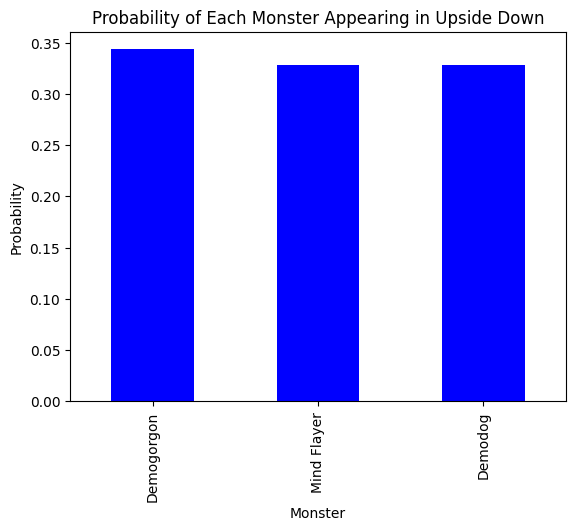

In [40]:
import matplotlib.pyplot as plt

# Bar chart of monster probabilities
upside_monster_probs.plot(kind="bar", color="blue", title="Probability of Each Monster Appearing in Upside Down")
plt.ylabel("Probability")
plt.xlabel("Monster")
plt.show()

# 6. Challenge: Experiment Here 🕵️‍♂️

Try the exercises and explore data on your own!

In [44]:
# Challenge 1: Identify the Riskiest Monster

# Probability of High severity per monster

# Most risky monster


In [45]:
# Challenge 2: Conditional Probability Exploration

# Probability of Medium severity per monster

# Probability of Low severity per monster


In [46]:
# Challenge 3: Parameter Tweaking

# Example: filter for weekend events (Saturday & Sunday)

# Probability of High severity on weekend
